In [43]:
from collections import defaultdict
from rdkit import Chem
from IPython.display import display, Markdown

def composition(molecule, isotopes=False):
    if molecule:
        Chem.AddHs(molecule)
        comp = defaultdict(lambda: 0)
        for atom in molecule.GetAtoms():
            element_symbol = atom.GetSymbol()
            if not isotopes:
                comp[element_symbol] += 1
            else:
                isotope = atom.GetIsotope()
                try:
                    comp[element_symbol][isotope] += 1
                except:
                    comp[element_symbol] = defaultdict(lambda: 0)
                    comp[element_symbol][isotope] += 1
        return comp

def convert_smiles_to_markdown_formula(smiles, isotopes=False):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        comp = composition(mol, isotopes)

        isotopes = defaultdict(lambda: defaultdict(str))
        subscripts = defaultdict(lambda: defaultdict(int))
        superscripts = defaultdict(list)

        for element, counts in comp.items():
            for isotope, count in counts.items():
                if count > 1:
                    subscripts[element][isotope] = count
                if isotope != 0:
                    superscripts[element].append(isotope)

                isotopes[element][isotope] = 1
            # Sort the element's isotopes from lowest to highest
            superscripts[element].sort()

        formula = {'markdown': "", 'dollar_math': ""}
        sorted_element_keys = sorted(isotopes.keys())
        for element in sorted_element_keys:
            isotope_count_pairs = isotopes[element]
            # Sort the element's isotopes from lowest to highest
            sorted_isotope_keys = sorted(isotope_count_pairs.keys())
            for isotope in sorted_isotope_keys:
                if element in superscripts:
                    if isotope in superscripts[element]:
                        formula["markdown"] += f"<sup>{isotope}</sup>"
                        # formula["dollar_math"] += f"$^\{isotope}$"
                        formula["dollar_math"] += "$^\{" + f"{isotope}" + "}$"
                formula["markdown"] += element
                formula["dollar_math"] += element
                if element in subscripts:
                    if isotope in subscripts[element]:
                        for isotope, isotope_count in subscripts[element].items():
                            formula["markdown"] += f"<sub>{isotope_count}</sub>"
                            formula["dollar_math"] += f"$_{isotope_count}$"
        display(Markdown(formula["markdown"]))
    else:
        return "Invalid SMILES"

# Example usage
smiles = "[18O]O[18O][16O][12C][13C]C[13C]"
convert_smiles_to_markdown_formula(smiles, isotopes=True)


C<sup>12</sup>C<sup>13</sup>C<sub>2</sub>O<sup>16</sup>O<sup>18</sup>O<sub>2</sub>

In [38]:
def list_to_markdown_table(data, headers=None):
    """
    Convert a list of lists into a Markdown table.
    
    Args:
        data (list): A list of lists, where each inner list corresponds to a row in the table.
        headers (list): An optional list of column headers.

    Returns:
        str: The Markdown-formatted table as a string.
    """
    if not data:
        return ""

    # Determine the number of columns
    num_columns = len(data[0])

    # Create the table headers if provided
    table = "|"
    if headers:
        table += " | ".join(headers) + " |\n"

        # Create the title divider line
        table += "|"
        for _ in range(num_columns):
            table += " --- |"
        table += "\n"

    # Create the table body
    for row in data:
        if len(row) != num_columns:
            raise ValueError("All rows must have the same number of columns")
        table += "| " + " | ".join(map(str, row)) + " |\n"

    return table


In [40]:
data = [
    ["Alice", 25, "Engineer"],
    ["Bob", 30, "Designer"],
    ["Charlie", 35, "Manager"]
]

# Create the table with headers
table = list_to_markdown_table(data, headers=["Name", "Age", "Occupation"])

# Print or display the table
display(Markdown(table))


|Name | Age | Occupation |
| --- | --- | --- |
| Alice | 25 | Engineer |
| Bob | 30 | Designer |
| Charlie | 35 | Manager |


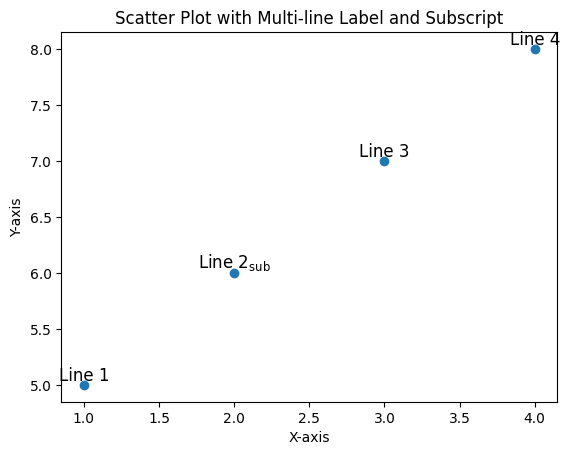

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Enable Matplotlib's built-in math rendering
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Sample data
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]
labels = ['Line 1', r'Line 2$_{\text{sub}}$', 'Line 3', 'Line 4']

# Create a scatter plot with multi-line labels
plt.scatter(x, y)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, verticalalignment='bottom', horizontalalignment='center', multialignment='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Multi-line Label and Subscript')
plt.show()


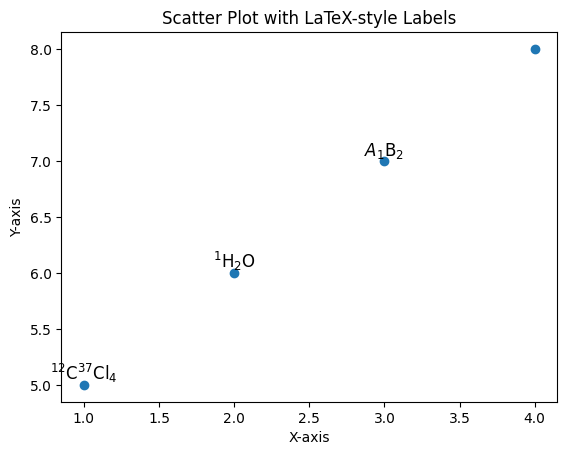

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]

# Labels using LaTeX-style formatting
labels = [r'$^{12}$C$^{37}$Cl$_4$', r'$^1$H$_2$O', r'$A_1$B$_2$']

# Create a scatter plot with labels
plt.scatter(x, y)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, verticalalignment='bottom', horizontalalignment='center', multialignment='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with LaTeX-style Labels')
plt.show()
